In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel('Feedback DS2.xlsx')
df.head()

,Timestamp,Apa course-mu?,Facilitator :,Sekarang kamu ada di chapter berapa?,Anda mengisi form ini untuk minggu ke berapa di chapter tersebut?,Bagaimana suasana kelas menurutmu?,Apakah materi/diskusi di kelas sesuai dengan kebutuhanmu?,Seberapa aplikatif-kah materi diskusi di kelas?,Apakah fasilitator secara keseluruhan membantu dalam mencapai kebutuhan belajarmu?,Apakah fasilitator memfasilitasi forum diskusi dengan interaktif?,Apakah fasilitator memberikan feedback yang membangun?,Apakah fasilitator memfasilitasi proses belajar mengajar di luar forum diskusi?,"Menurut kamu, apakah metode belajar secara umum membuatmu terlibat secara aktif?",Apakah metode belajar secara umum mendorongmu untuk mencari tahu lebih dalam?,"Secara umum, apakah teknis pelaksanaan sebelum dan selama kegiatan belajar mengajar sudah lancar?","Mengenai teknis pelaksanaan, mana dari beberapa poin di bawah ini yang masih perlu diperbaiki?","Secara keseluruhan, apa yang ingin kamu sampikan terkait kegiatan belajar mengajar?",Project,Wave,Date
0,2023-03-08 15:00:02.592,Data Science,F-DSC2200914 - Cindy Btari,1,NaN,5,5,5,5,5,5,5,5,5,5,Tidak ada,seluruh aspek sudah termasuk ke dalam kategori...,Fresh Graduate Academy 2023,1,2023-03-08 15:00:02.592
1,2023-03-12 21:23:55.968,Data Science,F-DSC2200914 - Cindy Btari,1,NaN,4,4,4,4,3,5,3,3,5,3,Tidak ada,yang perlu diperbaiki dari segi interaktif kel...,Fresh Graduate Academy 2023,1,2023-03-12 21:23:55.968
2,2023-03-12 22:03:31.104,Data Science,F-DSC2200914 - Cindy Btari,1,NaN,4,4,3,5,5,5,4,3,3,4,Mekanisme pengumpulan challenge,bagus,Fresh Graduate Academy 2023,1,2023-03-12 22:03:31.104
3,2023-03-12 22:03:58.752,Data Science,F-DSC2200914 - Cindy Btari,1,NaN,5,5,5,5,5,5,5,5,5,4,Tidak ada,kegiatan pembelajaran sudah berjalan dengan la...,Fresh Graduate Academy 2023,1,2023-03-12 22:03:58.752
4,2023-03-12 22:04:05.664,Data Science,F-DSC2200914 - Cindy Btari,1,NaN,5,5,5,5,5,4,5,5,5,5,Tidak ada,Yang perlu diperbaiki mungkin sistematika peny...,Fresh Graduate Academy 2023,1,2023-03-12 22:04:05.664


In [3]:
# rename 3rd column by index

df.rename(columns={df.columns[-4]:'Feedback'}, inplace=True)
df.head()

,Timestamp,Apa course-mu?,Facilitator :,Sekarang kamu ada di chapter berapa?,Anda mengisi form ini untuk minggu ke berapa di chapter tersebut?,Bagaimana suasana kelas menurutmu?,Apakah materi/diskusi di kelas sesuai dengan kebutuhanmu?,Seberapa aplikatif-kah materi diskusi di kelas?,Apakah fasilitator secara keseluruhan membantu dalam mencapai kebutuhan belajarmu?,Apakah fasilitator memfasilitasi forum diskusi dengan interaktif?,Apakah fasilitator memberikan feedback yang membangun?,Apakah fasilitator memfasilitasi proses belajar mengajar di luar forum diskusi?,"Menurut kamu, apakah metode belajar secara umum membuatmu terlibat secara aktif?",Apakah metode belajar secara umum mendorongmu untuk mencari tahu lebih dalam?,"Secara umum, apakah teknis pelaksanaan sebelum dan selama kegiatan belajar mengajar sudah lancar?","Mengenai teknis pelaksanaan, mana dari beberapa poin di bawah ini yang masih perlu diperbaiki?",Feedback,Project,Wave,Date
0,2023-03-08 15:00:02.592,Data Science,F-DSC2200914 - Cindy Btari,1,NaN,5,5,5,5,5,5,5,5,5,5,Tidak ada,seluruh aspek sudah termasuk ke dalam kategori...,Fresh Graduate Academy 2023,1,2023-03-08 15:00:02.592
1,2023-03-12 21:23:55.968,Data Science,F-DSC2200914 - Cindy Btari,1,NaN,4,4,4,4,3,5,3,3,5,3,Tidak ada,yang perlu diperbaiki dari segi interaktif kel...,Fresh Graduate Academy 2023,1,2023-03-12 21:23:55.968
2,2023-03-12 22:03:31.104,Data Science,F-DSC2200914 - Cindy Btari,1,NaN,4,4,3,5,5,5,4,3,3,4,Mekanisme pengumpulan challenge,bagus,Fresh Graduate Academy 2023,1,2023-03-12 22:03:31.104
3,2023-03-12 22:03:58.752,Data Science,F-DSC2200914 - Cindy Btari,1,NaN,5,5,5,5,5,5,5,5,5,4,Tidak ada,kegiatan pembelajaran sudah berjalan dengan la...,Fresh Graduate Academy 2023,1,2023-03-12 22:03:58.752
4,2023-03-12 22:04:05.664,Data Science,F-DSC2200914 - Cindy Btari,1,NaN,5,5,5,5,5,4,5,5,5,5,Tidak ada,Yang perlu diperbaiki mungkin sistematika peny...,Fresh Graduate Academy 2023,1,2023-03-12 22:04:05.664


In [4]:
text = df['Feedback'].values
text

array(['seluruh aspek sudah termasuk ke dalam kategori baik kecuali satu hal, yaitu ketertiban kelas. beberapa pertanyaan yang dilontarkan diluar topik sehingga fokus yang tadinya terhadap suatu masalah mengenai materi menjadi teralihkan.\n\nselanjutnya tentang bagaimana reaction peserta terhadap materi, beberapa ada yang over reaction yang membuat fokus peserta lainnya menjadi terganggu.',
       'yang perlu diperbaiki dari segi interaktif kelas, selain itu sudah baik',
       'bagus',
       'kegiatan pembelajaran sudah berjalan dengan lancar dan sesuai',
       'Yang perlu diperbaiki mungkin sistematika penyampaian materi, karena mungkin banyak peserta yang bertanya diluar topik jadinya keterusan untuk bahas itu sampe terlalu jauh keluar topik yang dipelajari saat itu.\n\nYang sudah baik, semuanya sudah sangat baik disamping bagian sistematika penyampaian (mungkin lebih ke moderasi materi aja sih)',
       'Penjelasan yang disampaikan oleh facil memberikan tambahan pengetahuan sehin

In [8]:
from wordcloud import WordCloud, STOPWORDS

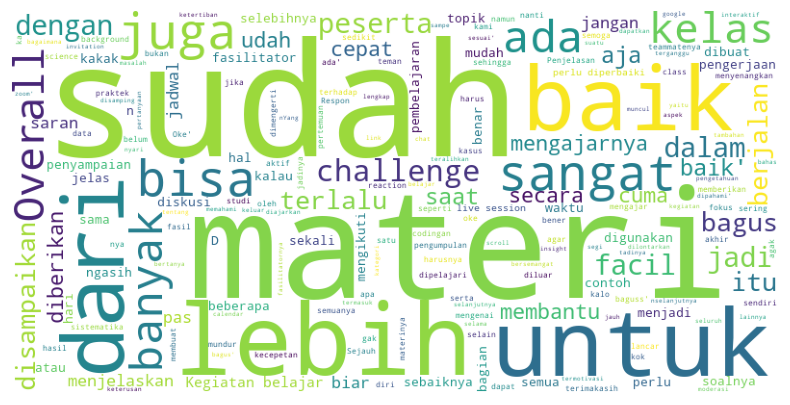

In [20]:
# create a wordcloud object
# define stopwords

stopwords = set(STOPWORDS)
stopwords.update(['aku', 'learn', 'yang', 'ini', 'saya', 'kursus', 'yg', 'mungkin', 'dan', 'kecuali', 'tapi', 'di', 'sih', 'apalagi', 'cindy', 'ke', 'di', 'karena', 'tidak', 'kak', 'lagi'])

# create a wordcloud object
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(str(text))

# display the wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()